<a href="https://colab.research.google.com/github/Shashi2022/object-detection/blob/master/transfer-learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Pandas and Numpy for data structures and util fucntions
import scipy as sp
import numpy as np
import pandas as pd
from numpy.random import rand
pd.options.display.max_colwidth = 600

# Scikit Imports
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.model_selection import train_test_split


# Matplot Imports
import matplotlib.pyplot as plt

%matplotlib inline

# pandas display data frames as tables
from IPython.display import display, HTML

import warnings
warnings.filterwarnings('ignore')

In [2]:

import tensorflow as tf
from keras import callbacks
from keras import optimizers
from keras.datasets import cifar10
from keras.engine import Model
from keras.applications import vgg16 as vgg
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
BATCH_SIZE = 32
EPOCHS = 10
NUM_CLASSES = 10

In [4]:
#LOading data from cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [5]:
#To know the shape of train dataset
X_train.shape

(50000, 32, 32, 3)

In [6]:
#To know the shape of train dataset
X_test.shape

(10000, 32, 32, 3)

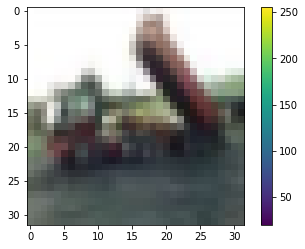

In [7]:
#plt.figure()
plt.imshow(X_train[2])
plt.colorbar()
#plt.grid(False)
plt.show()

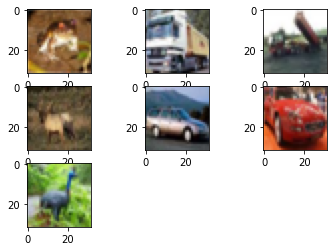

In [8]:
for i in range(7):
    # define subplot
    plt.subplot(330 + 1 + i)
   # plt.subplots(1, 5, figsize=(20,20))
    # plot raw pixel data
    plt.imshow(X_train[i])
plt.show()

In [9]:
#Normalization
X_train, X_test = X_train/255.0, X_test/255.0

In [10]:
#Using VGG16 pretrained model
base_model = vgg.VGG16(weights='imagenet', 
                       include_top=False, 
                       input_shape=(32, 32, 3))

In [11]:
# Extract the last layer from third block of vgg16 model
last = base_model.get_layer('block3_pool').output

In [12]:
# Add classification layers on top of it
x = GlobalAveragePooling2D()(last)
x= BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.6)(x)
pred = Dense(NUM_CLASSES, activation='softmax')(x)
model = Model(base_model.input, pred)

In [13]:

for layer in base_model.layers:
     layer.trainable = False

In [14]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0   

In [15]:
initial_weights = model.get_weights()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size = 32, epochs = 10, shuffle = True,validation_data=(X_test,y_test))
model.set_weights(initial_weights)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 403s 8ms/step - loss: 1.2315 - accuracy: 0.5733 - val_loss: 0.9200 - val_accuracy: 0.6731
Epoch 2/10
50000/50000 [==============================] - 400s 8ms/step - loss: 1.0092 - accuracy: 0.6515 - val_loss: 0.8523 - val_accuracy: 0.7008
Epoch 3/10
50000/50000 [==============================] - 399s 8ms/step - loss: 0.9302 - accuracy: 0.6774 - val_loss: 0.8199 - val_accuracy: 0.7147
Epoch 4/10
50000/50000 [==============================] - 398s 8ms/step - loss: 0.8788 - accuracy: 0.6960 - val_loss: 0.7972 - val_accuracy: 0.7213
Epoch 5/10
50000/50000 [==============================] - 401s 8ms/step - loss: 0.8324 - accuracy: 0.7144 - val_loss: 0.7940 - val_accuracy: 0.7202
Epoch 6/10
50000/50000 [==============================] - 402s 8ms/step - loss: 0.8026 - accuracy: 0.7223 - val_loss: 0.7635 - val_accuracy: 0.7326
Epoch 7/10
50000/50000 [==============================] - 397s

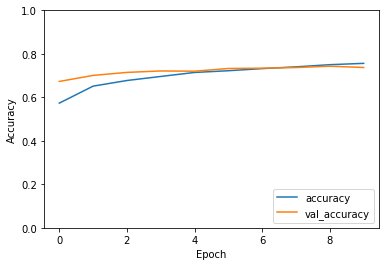

In [16]:
#Plot a graph : Accuracy Vs Val_Accuracy after data augmentation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [17]:
def load_image_show(image_path):
  from keras.preprocessing.image import load_img
  image = load_img(image_path, target_size=(32, 32))
  #plt.figure()
  plt.imshow(image)
  plt.colorbar()
  #plt.grid(False)
  plt.show()
  return image

In [18]:
#Changing image type to np array
def convert_np_array(image):
  type(image)
  test_img=np.asarray(image)
  test_singleimg=np.array([test_img])
  return test_singleimg

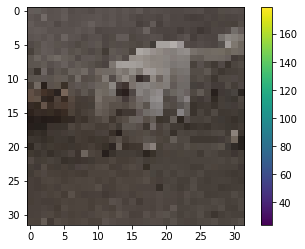

In [19]:

dog1 = load_image_show('/content/Dog1.jpg')

In [20]:
dog1_np = convert_np_array(dog1)

In [21]:
#Predicting with model
model.predict(dog1_np)

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

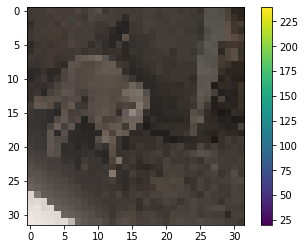

In [22]:
dog2 = load_image_show('/content/Dog2.jpg')

In [23]:
dog2_np = convert_np_array(dog2)

In [24]:
#Predicting with model
model.predict(dog2_np)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)